Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from itertools import chain
%matplotlib inline

Com o código abaixo, foi realizada a leitura dos dados recebidos no excel. Antes de ler esses dados, algumas correções foram feitas pois o excel estava identificando alguns valores float como datetime. Essa correção foi feita antes de ler o arquivo no python.

In [ ]:
df = pd.read_excel('/content/Cientista de Dados_airbnb (1).xlsx')
print(df.shape)

(7146, 34)


In [ ]:
df.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Guest suite',
       'Loft', 'Cottage', 'Hostel', 'Guesthouse', 'Serviced apartment',
       'Bungalow', 'Boutique hotel', 'Bed and breakfast', 'Hotel', 'Boat',
       'Other', 'Tiny house', 'Resort', 'Villa', 'Aparthotel',
       'Timeshare', 'In-law', 'Cabin', 'Treehouse', 'Castle',
       'Earth house'], dtype=object)

In [ ]:
df.neighbourhood_cleansed.unique()

array(['Western Addition', 'Bernal Heights', 'Haight Ashbury', 'Mission',
       'Potrero Hill', 'Downtown/Civic Center', 'Castro/Upper Market',
       'Inner Sunset', 'South of Market', 'Noe Valley', 'Nob Hill',
       'Outer Richmond', 'Presidio Heights', 'Glen Park', 'Ocean View',
       'Pacific Heights', 'Financial District', 'Twin Peaks',
       'Russian Hill', 'Outer Sunset', 'North Beach', 'Marina',
       'Inner Richmond', 'Excelsior', 'Seacliff', 'Chinatown',
       'West of Twin Peaks', 'Bayview', 'Diamond Heights',
       'Outer Mission', 'Parkside', 'Lakeshore', 'Crocker Amazon',
       'Golden Gate Park', 'Visitacion Valley', 'Presidio'], dtype=object)

Abaixo está um descritivo com informações estatísticas sobre os dados. Com essa tabela é possível fazer uma boa leitura das informações existentes, com exceção das variáveis categóricas.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_total_listings_count,7146.0,52.604954,177.428653,0.0,1.0,2.0,8.0,1199.0
accommodates,7146.0,3.201092,1.914916,1.0,2.0,2.0,4.0,16.0
bathrooms,7146.0,1.328086,0.793787,0.0,1.0,1.0,1.5,14.0
bedrooms,7146.0,1.342709,0.932855,0.0,1.0,1.0,2.0,14.0
beds,7146.0,1.764484,1.176789,0.0,1.0,1.0,2.0,14.0
minimum_nights,7146.0,15.817800,22.511624,1.0,2.0,4.0,30.0,365.0
number_of_reviews,7146.0,43.553876,72.538481,0.0,1.0,11.0,54.0,677.0
review_scores_rating,7146.0,96.034285,6.286139,20.0,95.0,98.0,99.0,100.0
review_scores_accuracy,7146.0,9.820319,0.601990,2.0,10.0,10.0,10.0,10.0
review_scores_cleanliness,7146.0,9.699552,0.703877,2.0,10.0,10.0,10.0,10.0


 

*   Os valores do review_scores_rating estão em uma escala diferente dos outros reviews.
*   As colunas com final "_na" são praticamente todas 0, não foi possível encontrar muita informação útil nelas.
*   As colunas com reviews são na maioria valores 10.
* As primeiras 4 colunas tem valores baixos, entre 0 e 15 aproximadamente, com exceção da host_total_listings_count que tem valores bastante altos que causam destaque. Esses valores mais altos são outliers que podem trazer informações relevantes.



In [ ]:
df['review_scores_rating'] = df['review_scores_rating']/10
df.drop(columns=df.iloc[:,24:34], inplace=True)
df.drop(columns=['latitude', 'longitude'], inplace=True)
df = pd.get_dummies(df,columns=['host_is_superhost', 'instant_bookable'] ,drop_first=True)
df = df.query('property_type == "Apartment" or property_type == "House"', engine='python')
df.reset_index(drop=True, inplace=True)
df.shape

(5000, 22)

In [ ]:
list_policys = df.cancellation_policy.unique()
info_to_maximize = ['price', 'host_total_listings_count']
list_categorical = list(df.select_dtypes(include=['object']).columns)
list_numeric = list(df.select_dtypes(include=np.number))
list_bool = ['host_is_superhost_t','instant_bookable_t']
list_numeric.remove('host_is_superhost_t'), list_numeric.remove('instant_bookable_t')

(None, None)

Feita a remoção de outliers 

In [ ]:
Q1 = np.percentile(df[list_numeric], 1.8, interpolation = 'midpoint')
Q3 = np.percentile(df[list_numeric], 98.2, interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

upper = np.where(df[list_numeric] >= (Q3+1.5*IQR))
lower = np.where(df[list_numeric] <= (Q1-1.5*IQR))
 
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)
 
print("New Shape: ", df.shape)
df.reset_index(drop=True, inplace=True)

Old Shape:  (5000, 22)
New Shape:  (4629, 22)


Plotada a matriz de correlação:

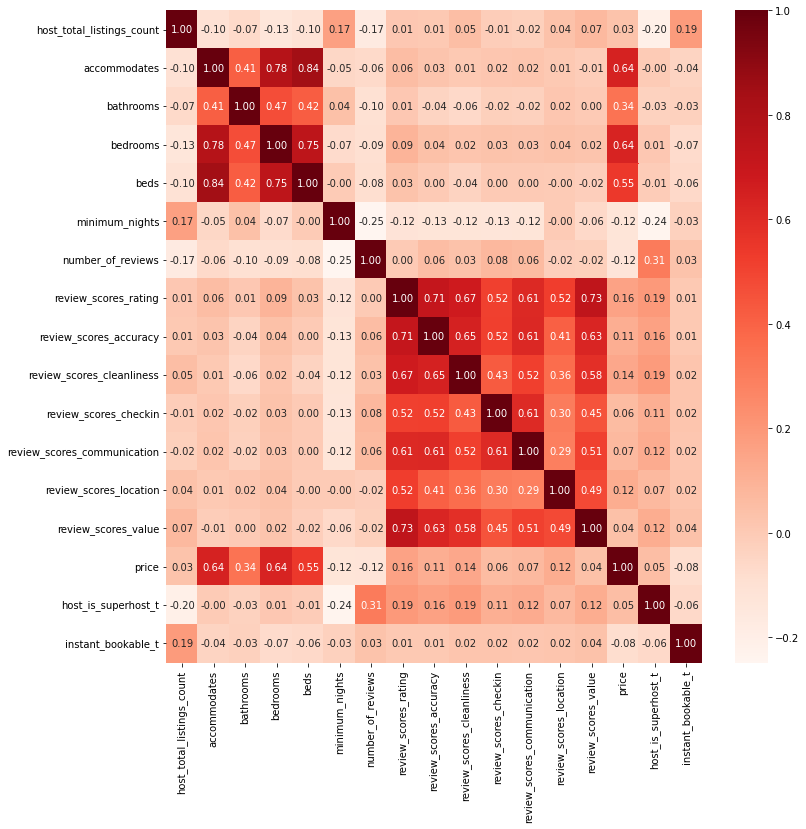

In [ ]:
plt.figure(figsize=(12,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.show()

Os valores que tem maior correlação podem ser utilizados para gerar componentes principais e reduzir a dimensionalidade das caracteristicas. A matriz de correlação também mostra algumas correlações negativas com o número mínimo de noites, superhost e numero de reviews.

In [ ]:
list_casa = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
list_reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
               'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
df_casa = df[list_casa]
df_reviews = df[list_reviews]

In [ ]:
pca_review = PCA(n_components = 1) 
pca_casa = PCA(n_components = 1)
pca_casa.fit(df_casa) 
pca_review.fit(df_reviews)

print(pca_casa.explained_variance_ratio_)
print(pca_review.explained_variance_ratio_)

X_casa = pca_casa.fit_transform(df_casa)
X_review = pca_review.fit_transform(df_reviews)

[0.86268321]
[0.62437941]


In [ ]:
df.drop(columns=list_casa, inplace=True)
df.drop(columns=list_reviews, inplace = True)
df['reviews'] = X_review
df['imovel'] = X_casa
df.head()

,cancellation_policy,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,bed_type,minimum_nights,number_of_reviews,price,host_is_superhost_t,instant_bookable_t,reviews,imovel
0,moderate,1.0,Western Addition,Apartment,Entire home/apt,Real Bed,1.0,180.0,170.0,1,1,-0.680728,-0.164638
1,strict_14_with_grace_period,2.0,Bernal Heights,Apartment,Entire home/apt,Real Bed,30.0,111.0,235.0,0,0,-0.240499,2.254241
2,strict_14_with_grace_period,10.0,Haight Ashbury,Apartment,Private room,Real Bed,32.0,17.0,65.0,0,0,3.296087,-1.083460
3,strict_14_with_grace_period,10.0,Haight Ashbury,Apartment,Private room,Real Bed,32.0,8.0,65.0,0,0,1.125372,-1.083460
4,moderate,1.0,Western Addition,Apartment,Entire home/apt,Real Bed,2.0,31.0,255.0,0,0,1.701435,3.070881


In [ ]:
list_categorical

['cancellation_policy',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type']

As variaveis categóricas podem ser utilizadas para outras análises se elas forem substituidas por numéricas.

In [ ]:
df_dummies = pd.get_dummies(df[list_categorical])

In [ ]:
df_numeric = df.drop(columns=list_categorical)
df_numeric = pd.concat([df_numeric, df_dummies], axis=1).reset_index(drop=True)
#df_numeric

In [ ]:
df.nunique()

cancellation_policy            6
host_total_listings_count     47
neighbourhood_cleansed        35
property_type                  2
room_type                      3
bed_type                       5
minimum_nights                37
number_of_reviews            330
price                        361
host_is_superhost_t            2
instant_bookable_t             2
reviews                      782
imovel                       374
dtype: int64

O método do cotovelo pode ser utilizado para encontrar o número ótimo de clusters a ser criado. Apesar do auxilio, o número final será definido com base na regra de negócio que fizer mais sentido para a análise.

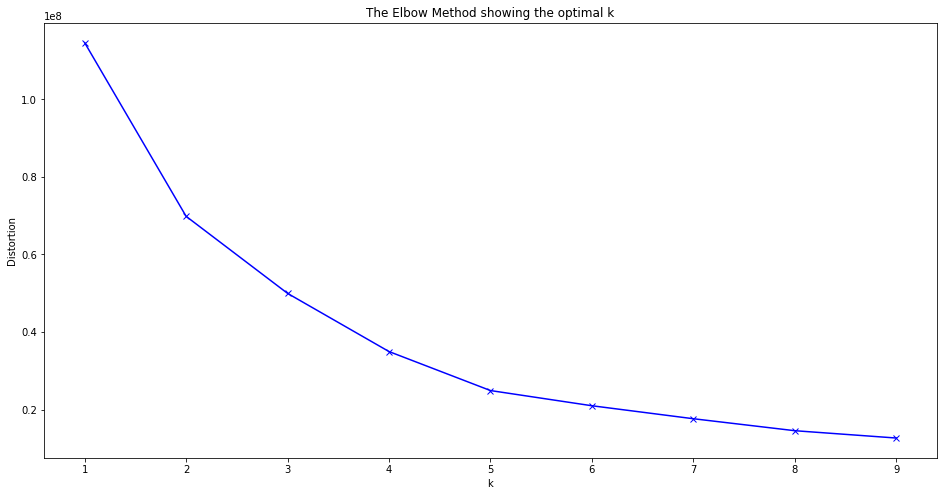

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_numeric)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Criação dos clusters

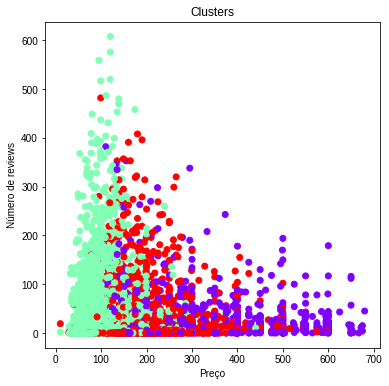

In [ ]:
X_normalizado = StandardScaler().fit_transform(df_numeric)
k = 3

kmeans = KMeans(n_clusters=k, max_iter=100)

clus = kmeans.fit_predict(X_normalizado)

fig, ax = plt.subplots(figsize=(6, 6))

plt.style.use('seaborn-white')
plt.title('Clusters')
plt.xlabel('Preço')
plt.ylabel('Número de reviews')
plt.scatter(df_numeric.price, df_numeric.number_of_reviews, c = clus, cmap='rainbow')
plt.show()

In [ ]:
df['cluster'] = clus

Análise do primeiro cluster 

In [ ]:
df_0 = df[df.cluster==0]
df_0.describe().T

,count,mean,std,min,25%,50%,75%,max
host_total_listings_count,820.0,3.000000,9.975917,1.000000,1.000000,1.000000,2.000000,194.000000
minimum_nights,820.0,10.575610,13.602158,1.000000,2.000000,3.000000,30.000000,90.000000
number_of_reviews,820.0,34.143902,51.023960,0.000000,3.000000,15.000000,43.000000,382.000000
price,820.0,320.600000,147.070601,40.000000,200.000000,299.000000,425.000000,680.000000
host_is_superhost_t,820.0,0.410976,0.492311,0.000000,0.000000,0.000000,1.000000,1.000000
instant_bookable_t,820.0,0.321951,0.467510,0.000000,0.000000,0.000000,1.000000,1.000000
reviews,820.0,-0.171995,0.799543,-0.812377,-0.724611,-0.374260,0.116149,6.354959
imovel,820.0,2.938677,2.671342,-2.583518,0.995953,2.857831,4.277106,15.658087
cluster,820.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Análise do segundo cluster

In [ ]:
df_1 = df[df.cluster==1]
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
host_total_listings_count,1875.0,5.412267,9.788051,0.000000,1.000000,3.000000,5.000000,129.000000
minimum_nights,1875.0,11.600000,15.232107,1.000000,1.000000,2.000000,30.000000,180.000000
number_of_reviews,1875.0,61.261867,85.990321,0.000000,3.500000,26.000000,85.000000,608.000000
price,1875.0,103.476800,52.044198,10.000000,69.000000,92.000000,125.000000,500.000000
host_is_superhost_t,1875.0,0.450667,0.497693,0.000000,0.000000,0.000000,1.000000,1.000000
instant_bookable_t,1875.0,0.440533,0.496584,0.000000,0.000000,0.000000,1.000000,1.000000
reviews,1875.0,0.060929,1.461219,-0.812377,-0.724611,-0.416804,0.335564,19.707214
imovel,1875.0,-1.258794,1.016400,-2.724991,-1.444815,-1.444815,-1.324363,6.395811
cluster,1875.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Análise do terceiro cluster

In [ ]:
df_2 = df[df.cluster==2]
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
host_total_listings_count,1934.0,47.600310,105.436530,0.000000,1.000000,2.000000,35.000000,483.000000
minimum_nights,1934.0,25.187177,27.257146,1.000000,4.000000,30.000000,30.000000,365.000000
number_of_reviews,1934.0,30.226991,56.271602,0.000000,0.000000,5.000000,31.000000,482.000000
price,1934.0,186.624612,89.070046,10.000000,125.000000,164.000000,225.000000,650.000000
host_is_superhost_t,1934.0,0.281282,0.449741,0.000000,0.000000,0.000000,1.000000,1.000000
instant_bookable_t,1934.0,0.382627,0.486154,0.000000,0.000000,0.000000,1.000000,1.000000
reviews,1934.0,0.013855,1.496720,-0.812377,-0.724611,-0.680728,0.157402,15.293988
imovel,1934.0,-0.025582,1.791952,-2.583518,-1.444815,-0.628175,0.974064,9.501037
cluster,1934.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Visualização gráfica de valores mais próximos da média dos dados

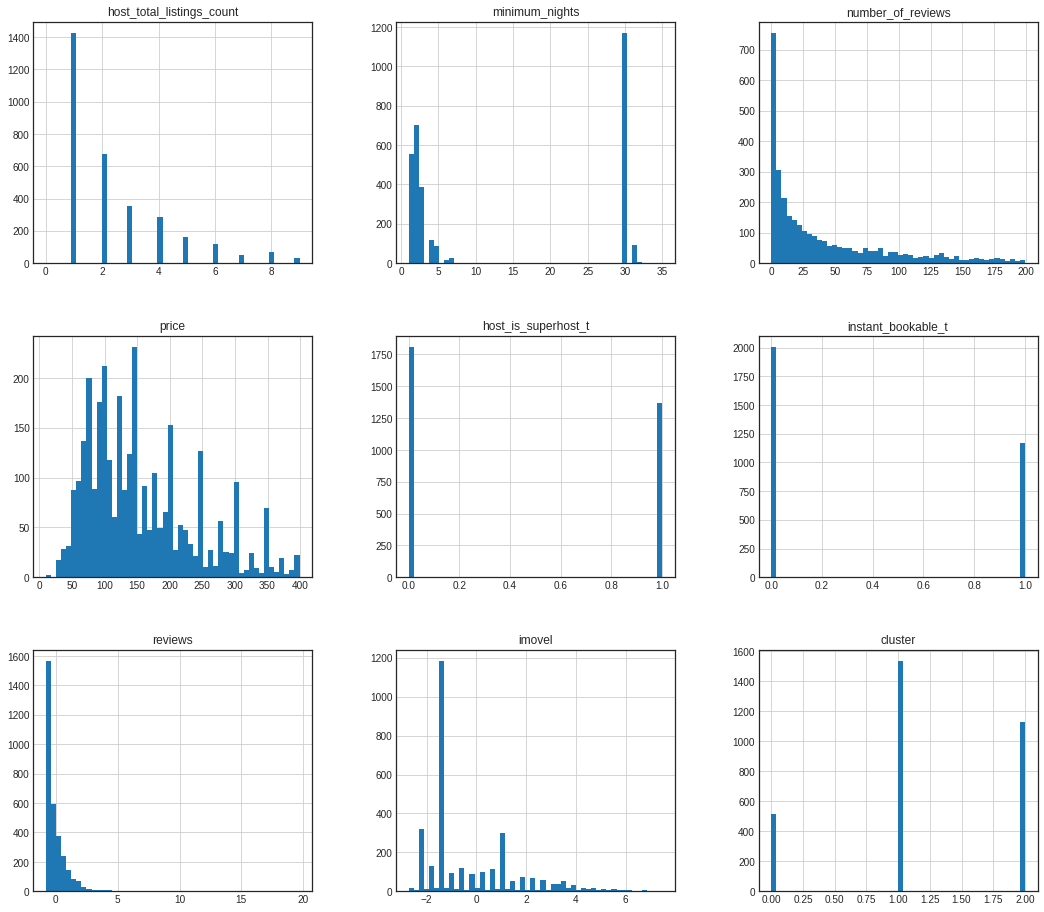

In [ ]:
df_normal = df.query('price < 400.0 and host_total_listings_count < 10 and number_of_reviews < 200 and minimum_nights < 40 and reviews < 20  and imovel < 7.5')
df_normal.hist(bins=50, figsize=(18,16))
plt.show()

Visualização da porcentagem de distribuição dos cluster para preço acima do terceiro quartil

Text(0.5, 1.0, 'Clusters com preço acima de 235')

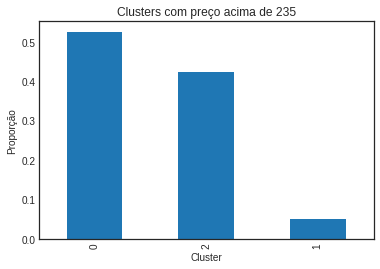

In [ ]:
df_caro = df.query('price > 235')

df_caro_porclus = df_caro.cluster.value_counts()/len(df_caro.cluster)
df_caro_porclus.plot.bar(x=df_caro_porclus.index, y=df_caro_porclus.values, rot=90)
plt.ylabel('Proporção')
plt.xlabel('Cluster')
plt.title('Clusters com preço acima de 235')

Visualização da porcentagem de distribuição dos cluster para imóveis com quantidade de aluguéis acima do terceiro quartil

Text(0.5, 1.0, 'Clusters alugados mais de 8 vezes')

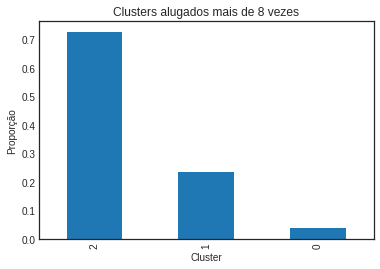

In [ ]:
df_mais_alugados = df.query('host_total_listings_count > 8')

df_mais_alugados_porclus = df_mais_alugados.cluster.value_counts()/len(df_mais_alugados.cluster)
df_mais_alugados_porclus.plot.bar(x=df_mais_alugados_porclus.index, y=df_mais_alugados_porclus.values, rot=90)
plt.ylabel('Proporção')
plt.xlabel('Cluster')
plt.title('Clusters alugados mais de 8 vezes')

Visualização da distribuição de cluster por variáveis categóricas disponíveis

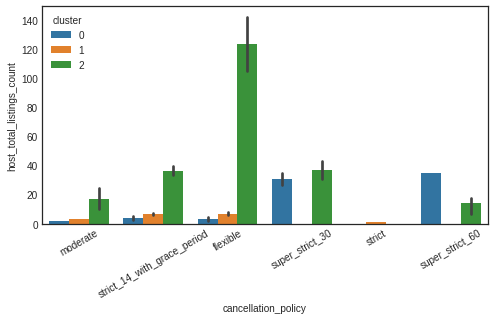

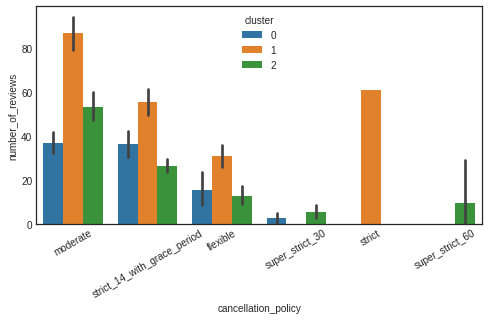

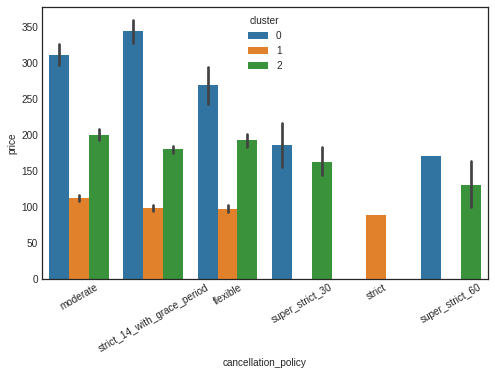

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
sns.barplot(data=df, x="cancellation_policy", y="host_total_listings_count", hue="cluster")

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
sns.barplot(data=df, x="cancellation_policy", y="number_of_reviews", hue="cluster")

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
sns.barplot(data=df, x="cancellation_policy", y="price", hue="cluster")

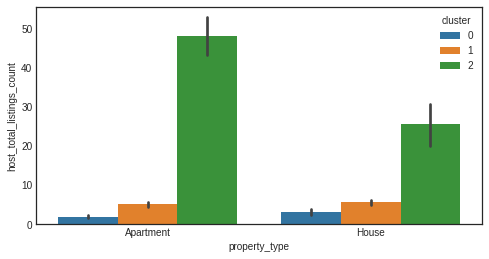

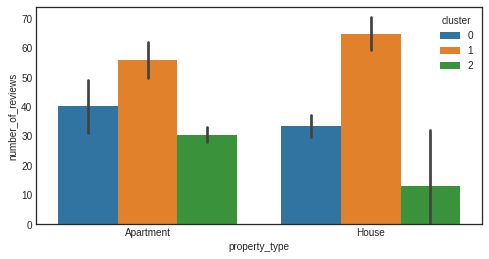

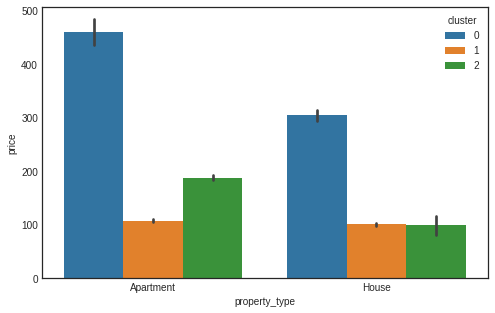

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
sns.barplot(data=df, x="property_type", y="host_total_listings_count", hue="cluster")

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
sns.barplot(data=df, x="property_type", y="number_of_reviews", hue="cluster")

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
sns.barplot(data=df, x="property_type", y="price", hue="cluster")

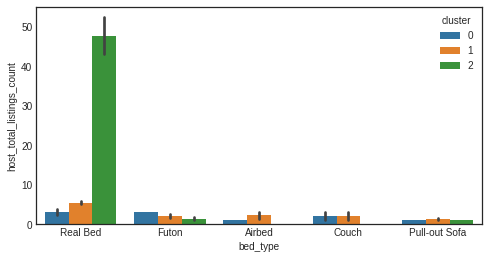

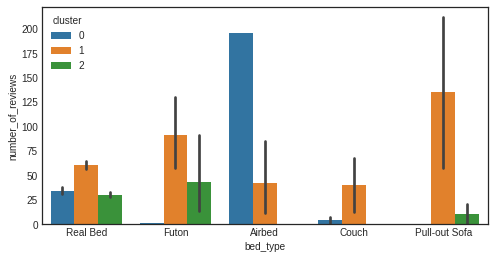

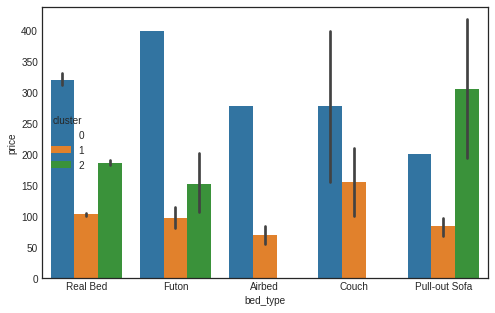

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
sns.barplot(data=df, x="bed_type", y="host_total_listings_count", hue="cluster")

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
sns.barplot(data=df, x="bed_type", y="number_of_reviews", hue="cluster")

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
sns.barplot(data=df, x="bed_type", y="price", hue="cluster")

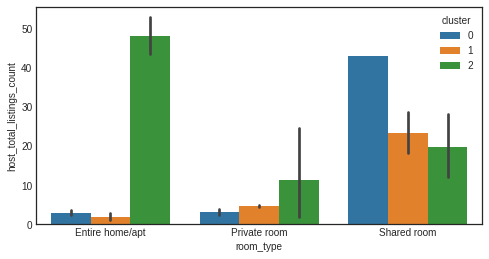

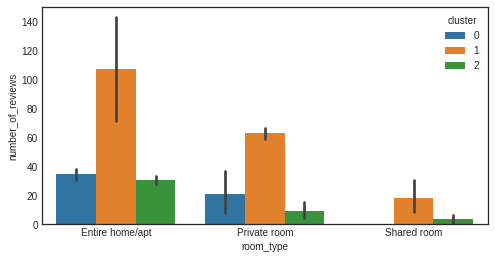

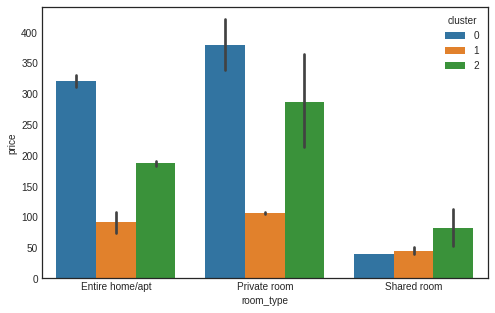

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
sns.barplot(data=df, x="room_type", y="host_total_listings_count", hue="cluster")

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
sns.barplot(data=df, x="room_type", y="number_of_reviews", hue="cluster")

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
sns.barplot(data=df, x="room_type", y="price", hue="cluster")

O gráfico abaixo mostra que a medida adotada pelo airbnb de penalidade a imóveis com política de cancelamento mais rigorosas é para que seja evitada uma política que faz com que os imóveis sejam menos alugados. Quanto mais rigorosa a política, menos alugado o imóvel é.

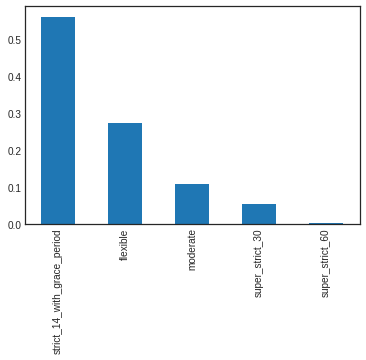

In [ ]:
df_mais_alugados = df.query('host_total_listings_count > 8')

df_mais_alugados_percent = df_mais_alugados.cancellation_policy.value_counts()/len(df_mais_alugados.cancellation_policy)
df_mais_alugados_percent.plot.bar(x=df_mais_alugados_percent.index, y=df_mais_alugados_percent.values, rot=90)

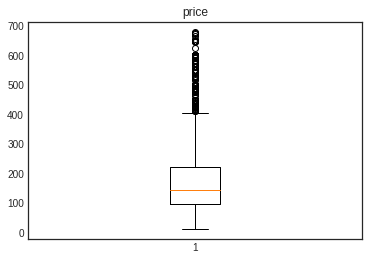

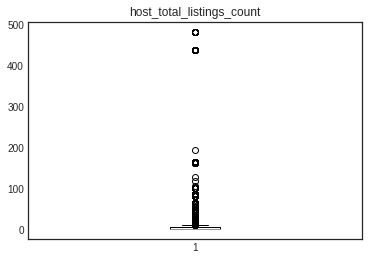

In [ ]:
for col in info_to_maximize:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(col)

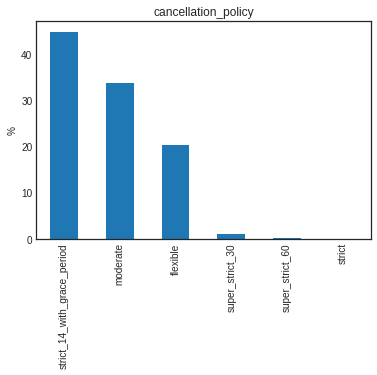

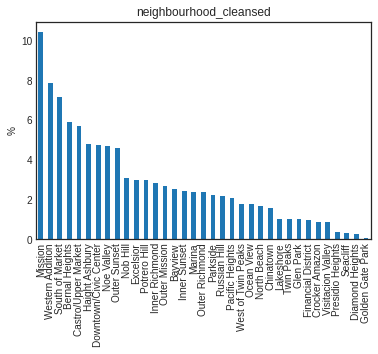

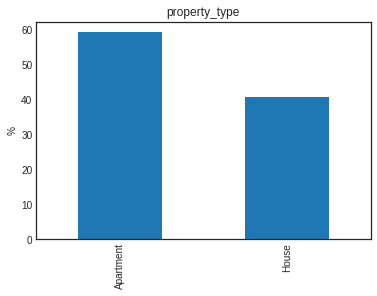

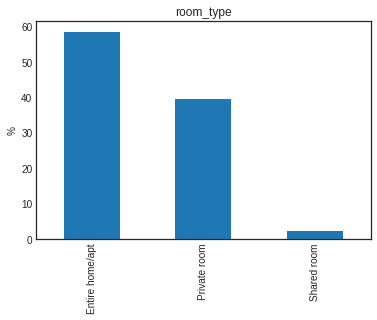

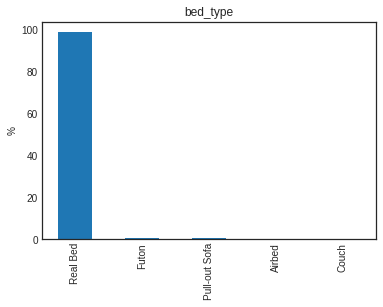

In [ ]:
for col in list_categorical:
    plt.figure()
    df_col = (df[col].value_counts(dropna=False)/len(df[col]))*100
    df_col.plot(kind='bar')
    plt.title(col)
    plt.ylabel('%', fontsize=10)

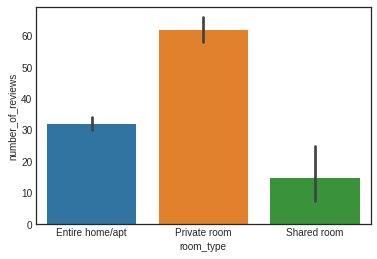

In [ ]:
sns.barplot(data=df, x="room_type", y="number_of_reviews")

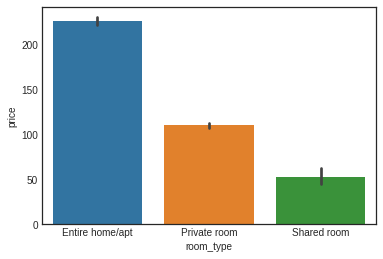

In [ ]:
sns.barplot(data=df, x="room_type", y="price")

Casa inteira aluga mais vezes mesmo sendo o mais caro.

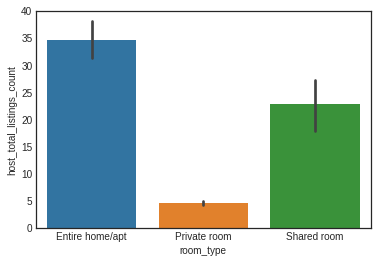

In [ ]:
sns.barplot(data=df, x="room_type", y="host_total_listings_count")

Private room é o que tem mais reviews porém é o que menos aluga. Necessário analisar que condições estão causando isso.

In [ ]:
df.price.max()

680.0

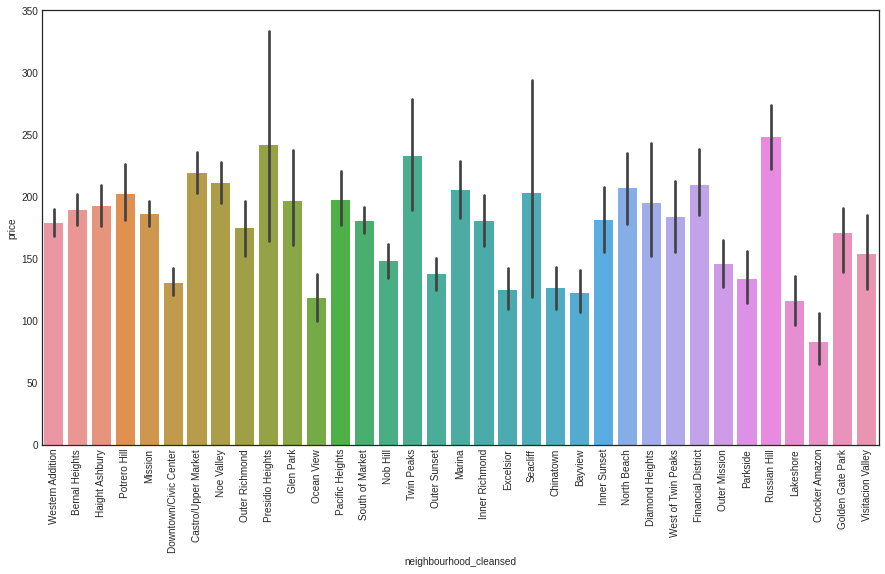

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.barplot(data=df, x="neighbourhood_cleansed", y="price")

Primeira premissa adotada -> Quando maior o número de reviews, maior quantidade de locações foram feitas.

Pode ser verificado que quanto maior a quantidade de dias mínimos para a locação, menos o imóvel é locado. 
Sugestões: 
1. Reduzir número mínimo de noites para a locação.
2. 


In [ ]:
def get_feature_importance(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, 
                                                      y, 
                                                      test_size=0.30, 
                                                      random_state=42)

  scaler=StandardScaler()
  X_train_imp=scaler.fit_transform(X_train)

  X_test_imp=scaler.transform(X_test)

  lm_model = LinearRegression(normalize=True) 
  lm_model.fit(X_train_imp, y_train) 

  y_test_preds = lm_model.predict(X_test_imp)
  y_train_preds = lm_model.predict(X_train_imp)

  test_score = r2_score(y_test, y_test_preds)
  train_score = r2_score(y_train, y_train_preds)

  feature_importances = pd.DataFrame(lm_model.coef_,
                                    index = X_train.columns,
                                    columns=["coefficient"]).sort_values("coefficient", ascending=False)
  return feature_importances

Verificação de características que mais impactam na definição do preço do imóvel

In [ ]:
y_price  = df["price"]
X_price  = df.drop(columns=['price',
                      'cancellation_policy',
                      'neighbourhood_cleansed',
                      'property_type',
                      'room_type',
                      'bed_type' ], axis=0)

get_feature_importance(X_price,y_price)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


,coefficient
imovel,77.873876
host_total_listings_count,17.565402
host_is_superhost_t,7.470912
cluster,-5.044091
instant_bookable_t,-7.973168
number_of_reviews,-10.034708
reviews,-10.820267
minimum_nights,-11.693983


Verificação de características que mais impactam na quantidade de alugueis que o imóvel atinge.

In [ ]:
y_host_total_listings_count  = df["host_total_listings_count"]
X_host_total_listings_count  = df.drop(columns=['host_total_listings_count',
                      'cancellation_policy',
                      'neighbourhood_cleansed',
                      'property_type',
                      'room_type',
                      'bed_type' ], axis=0)

get_feature_importance(X_host_total_listings_count,y_host_total_listings_count)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


,coefficient
price,17.874420
cluster,15.772178
instant_bookable_t,13.810652
minimum_nights,6.973778
reviews,-4.361955
number_of_reviews,-5.692814
host_is_superhost_t,-11.211129
imovel,-14.922780


Verificar o Futurewarning com mais calma depois